In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '1'

import torch
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/yqinar/miniconda3/envs/test/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
base_dir=''

y_pred=np.load(os.path.join(base_dir,"y_pred.npy"),allow_pickle=True)
y_gt=np.load(os.path.join(base_dir,"y_gt.npy"),allow_pickle=True)
c_pred=np.load(os.path.join(base_dir,"c_pred.npy"),allow_pickle=True)
c_gt=np.load(os.path.join(base_dir,"c_gt.npy"),allow_pickle=True)

In [4]:
# hard coding y_class_num=200, concept_num=112
plot_size=112
selected_class_idx=158
per_class_c_pred=torch.tensor(c_pred[y_pred==selected_class_idx])
pred_plot=torch.zeros(plot_size,plot_size)
for i in range(per_class_c_pred.shape[0]):
    for j in range(0,plot_size):
        for k in range(0,plot_size):
            if per_class_c_pred[i,j] ==1 and per_class_c_pred[i,k] ==1:
                pred_plot[j,k]+=1
joint_map_pred=pred_plot/per_class_c_pred.shape[0]
# print(pred_plot)
per_class_c_gt=torch.tensor(c_gt[y_gt==selected_class_idx])
gt_plot=torch.zeros(plot_size,plot_size)
for i in range(per_class_c_gt.shape[0]):
    for j in range(0,plot_size):
        for k in range(0,plot_size):
            if per_class_c_gt[i,j] ==1 and per_class_c_gt[i,k] ==1:
                gt_plot[j,k]+=1
joint_map_gt=gt_plot/per_class_c_pred.shape[0]


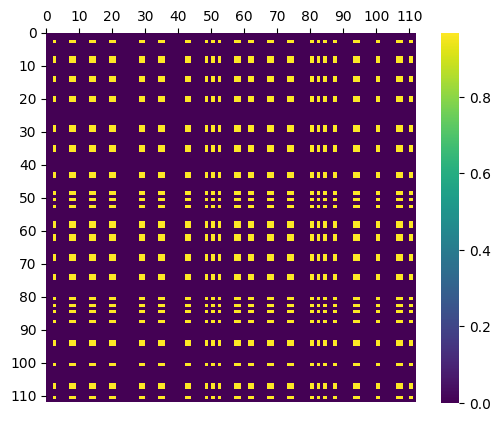

In [5]:
ax=sns.heatmap(joint_map_gt,cmap='viridis',square=True)
ax.xaxis.tick_top()
new_ticks = range(0, plot_size, 10)
ax.set_xticks(new_ticks)
ax.set_xticklabels(new_ticks)
ax.set_yticks(new_ticks)
ax.set_yticklabels(new_ticks)
plt.show()

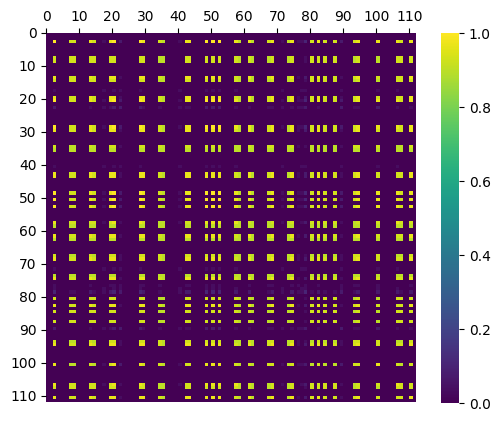

In [6]:
ax=sns.heatmap(joint_map_pred,cmap='viridis',square=True)
ax.xaxis.tick_top()
new_ticks = range(0, plot_size, 10)
ax.set_xticks(new_ticks)
ax.set_xticklabels(new_ticks)
ax.set_yticks(new_ticks)
ax.set_yticklabels(new_ticks)
plt.show()